In [3]:
# Own implementation of a simple polynomial fit library
%matplotlib inline

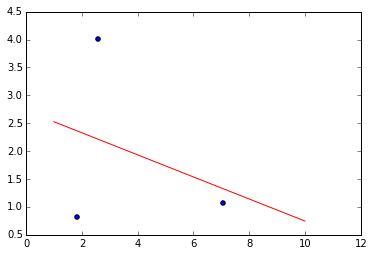

In [5]:
# This simple snippet of code is from Wikipedia

import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(3, 2) * 10
a = np.matrix([ [1,x[0][0]], [1,x[1][0]], [1,x[2][0]] ])
b = np.matrix([ [x[0][1]], [x[1][1]], [x[2][1]] ])
yy = (a.T * a).I * a.T * b
xx = np.linspace(1, 10, 50)
y = np.array(yy[0] + yy[1] * xx)

plt.figure(1)
plt.plot(xx, y.T, color='r')
plt.scatter([x[0][0], x[1][0], x[2][0] ], [x[0][1], x[1][1], x[2][1] ]) 
plt.show()

[[ 3.58276424]
 [ 2.174454  ]
 [-0.2601227 ]]


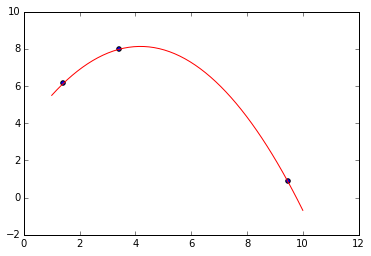

In [6]:
# I then altered it for a second degree polynomial

import numpy as np
import matplotlib.pyplot as plt

xypairs = np.random.rand(3, 2) * 10

Xmatrix = np.matrix([ [1,xypairs[0][0],xypairs[0][0]**2], [1,xypairs[1][0],xypairs[1][0]**2], [1,xypairs[2][0],xypairs[2][0]**2] ])
yvec = np.matrix([ [xypairs[0][1]], [xypairs[1][1]], [xypairs[2][1]] ])
beta = (Xmatrix.T * Xmatrix).I * Xmatrix.T * yvec
print beta

xx = np.linspace(1, 10, 50)
y = np.array(beta[0] + beta[1] * xx + beta[2]* xx**2)

plt.figure(1)
plt.plot(xx, y.T, color='r')
plt.scatter([xypairs[0][0], xypairs[1][0], xypairs[2][0] ], [xypairs[0][1], xypairs[1][1], xypairs[2][1] ]) 
plt.show()

In [7]:
# And then generalized it for an M-order polynomial data

def polyFit(data,M):
    # data should be in the format: n by 2 numpy matrix
    # M is order of polynomial fit
    
    n = data.shape[0]

    # Xmatrix is n by M
    protomatrix = np.zeros((n,M))
    Xmatrix = np.matrix(protomatrix)
    print Xmatrix
    for i in range(n):
        for j in range(M):
            Xmatrix[i,j] = data[i,0] ** j
    print Xmatrix
    
    # yvec is an n-dimensional vector of target values
    yvec = data[:,1]
    yvecmatrix = np.matrix(yvec)
    yvecmatrix = yvecmatrix.T 
    print yvecmatrix
    
    # Find optimal parameters by solving the normal equation
    beta = (Xmatrix.T * Xmatrix).I  * Xmatrix.T *yvecmatrix
    print 'beta is'
    print beta
    
    # Prepare for plotting
    minx = min(data[:,0]) - 1
    maxx = max(data[:,0]) + 1
    xx = np.linspace(minx, maxx, 50)
    
    # Plot polynomial fit
    y = np.array(xx*0)
    for j in range(M):
        y = y + beta[j]*xx**j
        
    plt.figure(1)
    plt.plot(xx, y.T, color='r')
    plt.scatter(data[:,0],data[:,1]) 
    plt.show()

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[  1.00000000e+00   8.02330381e+00   6.43734040e+01   5.16487377e+02]
 [  1.00000000e+00   2.73320648e-01   7.47041764e-02   2.04181939e-02]
 [  1.00000000e+00   7.60644147e+00   5.78579519e+01   4.40093125e+02]
 [  1.00000000e+00   1.04152707e+00   1.08477863e+00   1.12982631e+00]
 [  1.00000000e+00   7.88254207e+00   6.21344695e+01   4.89777570e+02]
 [  1.00000000e+00   4.00091338e+00   1.60073078e+01   6.40438521e+01]]
[[ 5.76263472]
 [ 0.09924918]
 [ 9.50911546]
 [ 9.6769946 ]
 [ 7.76996295]
 [ 5.0012401 ]]
beta is
[[ -1.00763879]
 [ 10.94299825]
 [ -3.29311461]
 [  0.25938221]]


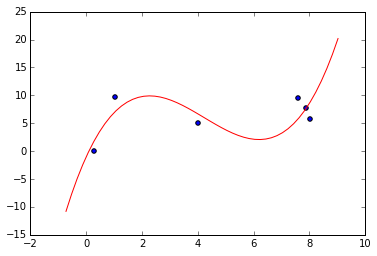

In [9]:
data = np.random.rand(6, 2) * 10
M = 4
polyFit(data,M)